In [ ]:
print("Hello")

Hello


In [ ]:
from data import HSTrainingData
from data import HSTestData
import matplotlib.pyplot as plt
import scipy.io
import torch
from SSPSR import SSPSR
from torch.utils.data import DataLoader
import numpy as np




# Model Visualization

Number of channels = 8
[4 6 2]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


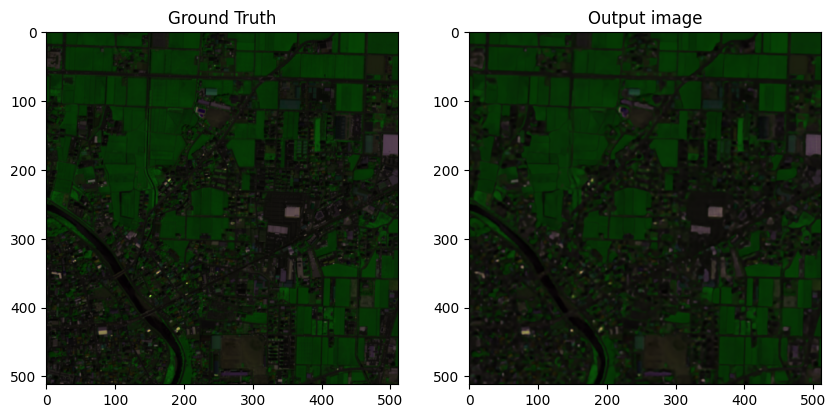

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


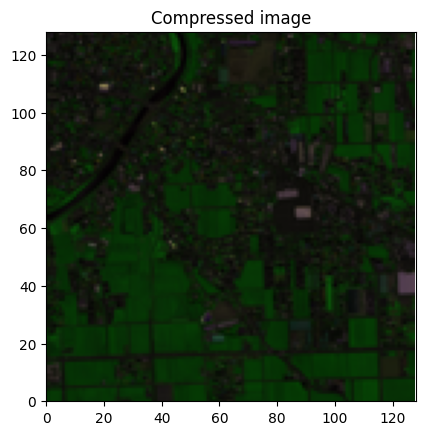

Number of channels = 16
[ 8 12  4]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


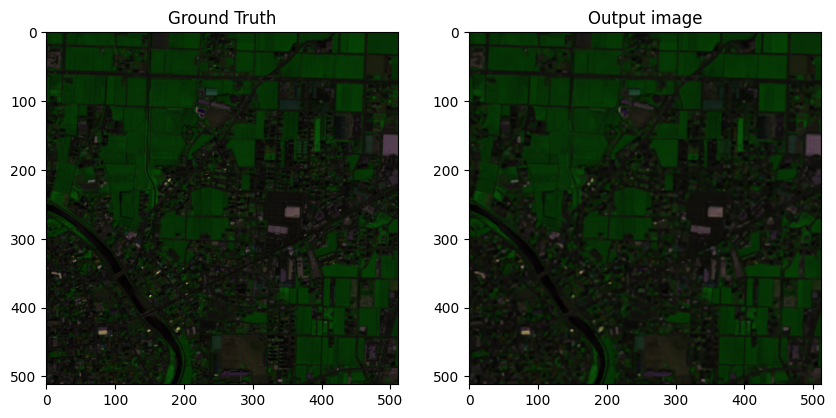

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


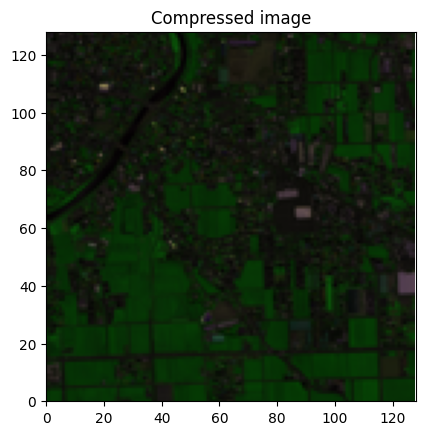

Number of channels = 32
[17 25  9]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


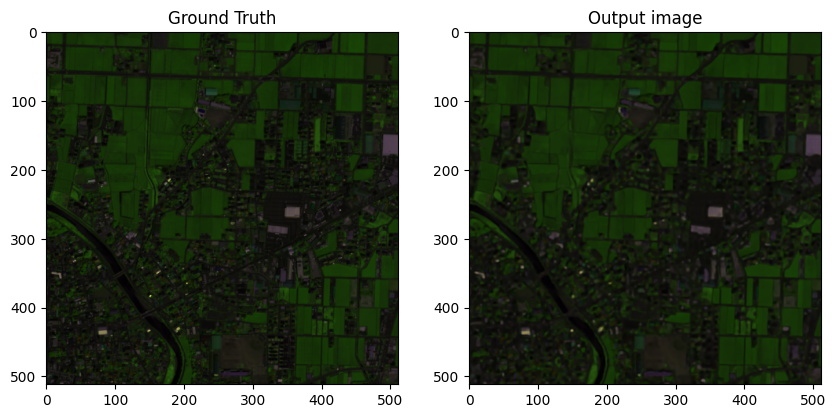

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


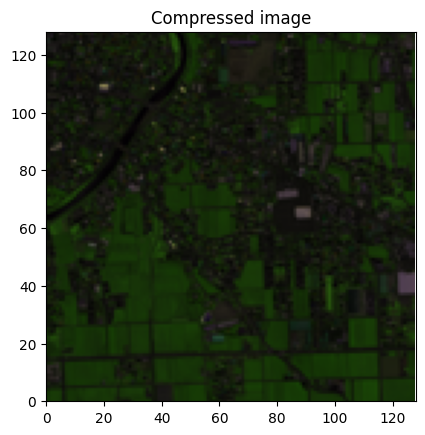

Number of channels = 64
[35 50 18]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


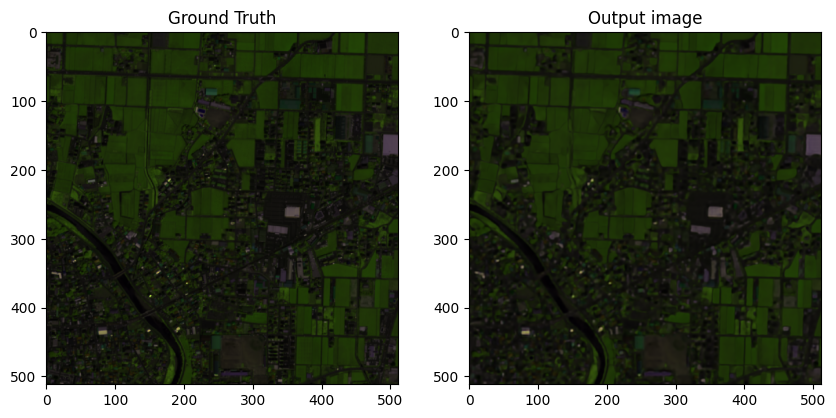

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


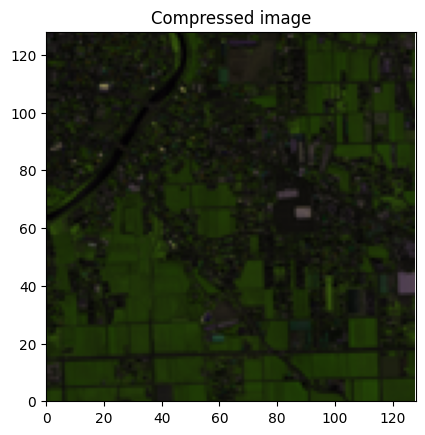

Number of channels = 128
[ 70 100  36]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


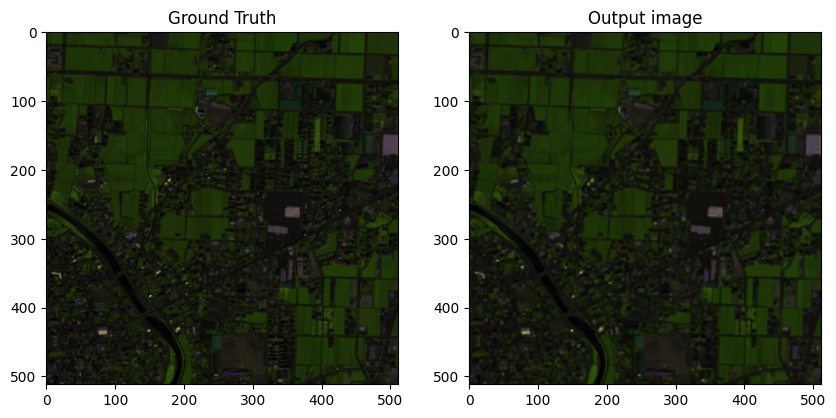

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


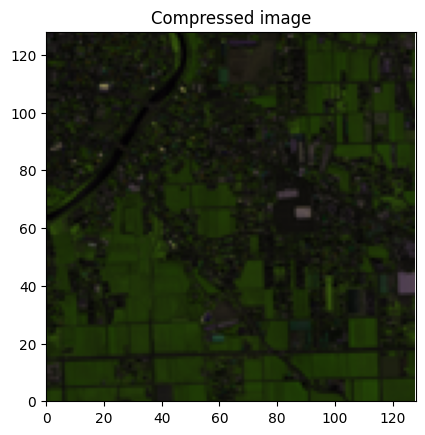

In [ ]:
ar = [8, 16, 32, 64, 128]

for i in ar:

    colorsc = i
    print("Number of channels = " + str(i))
    mat = np.array([70, 100, 36])
    matt = np.round((mat*(colorsc/128)).astype(int))
    print(np.round((mat*(colorsc/128)).astype(int)))

    net = SSPSR(n_subs=8, n_ovls=2,n_colors=colorsc,  n_blocks=3, n_feats=256, n_scale=4, res_scale=0.1)
    net.load_state_dict(torch.load("m" + str(colorsc) + ".pth"))
    device = torch.device("cuda")
    net.to(device).train()
    test_set = HSTestData(image_dir=test_path3,colors = colorsc )
    test_loader = DataLoader(test_set, batch_size=1, num_workers=8)


    for iteration, (x, lms, gt) in enumerate(test_loader):

        x, lms, gt = x.to(device), lms.to(device), gt.to(device)
        y = net(x, lms)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        ax1.set_title('Ground Truth')
        ax1.imshow(gt.squeeze().cpu().numpy().transpose(1, 2, 0)[:,:,matt])
        ax2.set_title('Output image')
        ax2.imshow(y.detach().squeeze().cpu().numpy().transpose(1, 2, 0)[:,:,matt])
        plt.show()

        plt.title("Compressed image")
        plt.gca().set_aspect("equal")
        plt.xlim(0, x.squeeze().cpu().numpy().transpose(1, 2, 0)[:,:,matt].shape[1])
        plt.ylim(0, x.squeeze().cpu().numpy().transpose(1, 2, 0)[:,:,matt].shape[0])
        plt.imshow(x.squeeze().cpu().numpy().transpose(1, 2, 0)[:,:,matt])
        plt.show()
        break

